# The Wave Equation

The following will demonstrate integration of a differential equation for a wave equation in one dimension on a unstructured grid.  The basic form of the wave equation is,

\begin{equation}
f(x,t) = A\cos(kx - \omega t),
\end{equation}
where $k$ is the wave vector, $\omega$ is the angular frequency and $A$ is the amplitude of the wave.

The wave obeys the following differential equation,

\begin{align}
\partial_tf(x,t) &= \omega A\sin(kx - \omega t)\nonumber\\
&= -v\partial_xf(x,t),\\
\partial^2_tf(x,t) &= v^2\partial^2_xf(x,t)
\end{align}
where $v = \frac{\omega}{k}$ is the wave velocity.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Interpolator
from etraj.etraj import Vector, Matrix, UGrid, Interpolator, ScalarField, WaveEQ1D

import etraj.etraj as et

In [8]:
# we can use numpy to generate a uniform sample over [-pi,pi]
N = 100
x = np.random.uniform(-np.pi,np.pi,N)

# and then create the unstructured grid
g = UGrid(x)

In [9]:
# setting A = k = w = 1,
A = 1
k = 1
w = 1
# the field values at t = 0 are
p = A*np.cos(k*x)

In [10]:
# finally we have for the field,
W = WaveEQ1D(g,A,k,w)
W.set_field(p)
W.get_Interpolator().set_k(10)
W.get_Interpolator().set_n(5)
W.set_approx_type('LS')
print(W.get_Interpolator())


Interpolator type: Vanilla least squares
Least squares driver type: xGELS
Interpolator parameters - k = 10
                          n = 5


[0.0, 1.2566652348903506, 2.5130103311615084, 3.7689430234429695, 5.024371281930279, 6.279203299702367, 7.533347479561254, 8.786712420426008, 10.039206903314192, 11.290739876944771, 12.54122044299756, 13.790557841065068, 15.038661433333592, 16.285440689030857, 17.530805168678697, 18.77466450818945, 20.016928402845718, 21.257506591203306, 22.496308838958075, 23.73324492281733, 24.968224614417153, 26.201157664326942, 27.431953786183065, 28.6605226409931, 29.886773821652774, 31.110616837717092, 32.331961100467666, 33.55071590831735, 34.766790432593915, 35.98009370374318, 37.19053459799264, 38.39802182451512, 39.602463913132546, 40.80376920259816, 42.00184582949572, 43.196601717793015, 44.387944569086244, 45.575781853570945, 46.76002080177423, 47.94056839708188, 49.11733136909289, 50.290216187832755, 51.45912905885576, 52.62397591926495, 53.78466243467718, 54.94109399715941, 56.093175724160794, 57.24081245846335, 58.383908769173104, 59.52236895377086, 60.65609704124151, 61.78499679629773, 

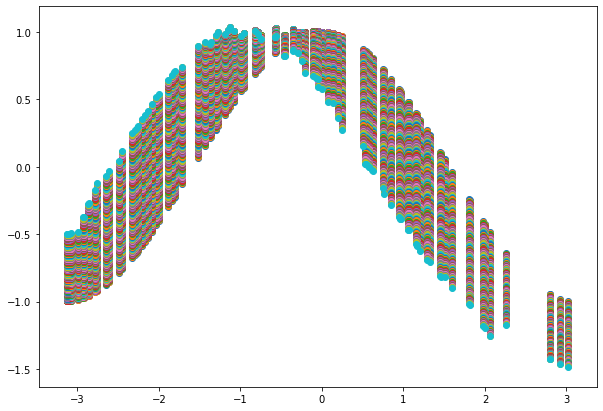

In [11]:
# first import the integrator
from etraj.etraj import Integrator
fig,axs = plt.subplots(figsize=(10,7))
t = 0
field = np.asarray(W.get_field())
true = np.cos(x + t)
error = [np.sum(np.abs(field-true))]
for i in range(100):
    t += 0.01
    W.get_integrator().scalar_RK4_step(g,W,0.01)
    field = np.asarray(W.get_field())
    true = np.cos(x - t)
    error.append(np.sum(np.abs(field-true)))
    axs.scatter(x,W.get_field())

NameError: name 'G' is not defined

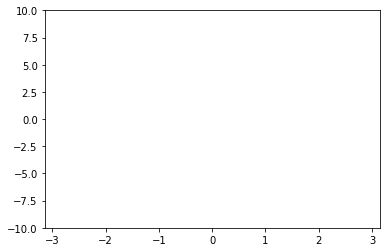

In [20]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
line, = ax.plot([], [], linestyle="",marker='x')


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-10, 10)
    return line,



# animation function. This is called sequentially
def animate(i):
    G.get_integrator().scalar_RK4_step(g,G,0.01)
    y = G.get_field()
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

HTML(anim.to_html5_video())
# # Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
# anim.save('gauss.mp4', writer=writer)
# plt.show